# First simulation

In this example, we show how to build a `SeisCL` object and how to call the program to perform seismic modeling.

Let's examine the 2D isotropic elastic medium. To solve the the heterogeneous wave equation, SeisCL uses multiple input files which respectively contains the simulation constants, the model parameters and the recorded data.

The first thing to do is to load the SeisCL class and relevant module:

In [6]:
from SeisCL import SeisCL
seis = SeisCL()
import numpy as np
import matplotlib.pyplot as plt

### Simulation Domain

We can begin by setting up each of the simulation constants. They are stored in the dictionnary `seis.csts` which will later be written to disk. Reasonable defaults are available and the whole dictonnary can be accessed in the `SeisCL` class (Jupyter Notebook). Here we will only change the ones that are relevant for viscoelastic modeling, starting with the computational cell.

We're going to build a 2 dimensional square domain of size $ \small 500 \times 500 \; (m) $ with a cell length of $ \small 2m$ in all directions with  $\small 1000 \times 0.25ms $ time step for a total of $\small 0.25s $.



In [7]:
seis.csts['ND'] = 2                                 # Number of dimension
seis.csts['N'] = np.array([250, 250])               # Grid size [NZ, NX, NY]
seis.csts['dh'] = dh = 2                            # Grid spatial spacing
seis.csts['dt'] = dt = 0.25e-03                     # Time step size
seis.csts['NT'] = NT = 1000                         # Number of time steps

### Model parameters

The viscoelastic model used here is homogenous with $\small V_p = 3500 m/s$, $ \small V_s = 2000 m/s$, $ \small \rho = 2000 kg/m^3$. A dictionnary is then created with those parameters in all 2 dimensions.

In [8]:
vp = 3500
vs = 2000
rho = 2000

vp_a = np.zeros(seis.csts['N']) + vp
vs_a = np.zeros(seis.csts['N']) + vs
rho_a = np.zeros(seis.csts['N']) + rho

model_dict = {"vp": vp_a, "rho": rho_a, "vs": vs_a} 


### Sources

Next we define geophones and source(s) positions. By default the function will create one source and a line of receivers near the surface of the model. 



In [9]:
seis.fill_src_rec_reg()             #TODO : Changer le nom de la fonction
                                    #       Reset à chaque fois? 

### Simulation

Next, we use `seis.set_forward` routine which will write constants, model and sources/receiver on disk to be read.

Finally, `seis.execute()` will launch SeisCL.

In [10]:
gsid = seis.src_pos_all[3]
seis.set_forward(gsid, model_dict, withgrad=False) #TODO changer dépendance set_foward à jobids
seis.execute()
datafd = seis.read_data()
datafd = datafd[-1]                                #Quel est l'utilité?

The result of SeisCL is a `.out` file which is read with `seis.read_data()`.

### Visualization

With matplotlib, we can finally analyze and visualize the result of our simulation.


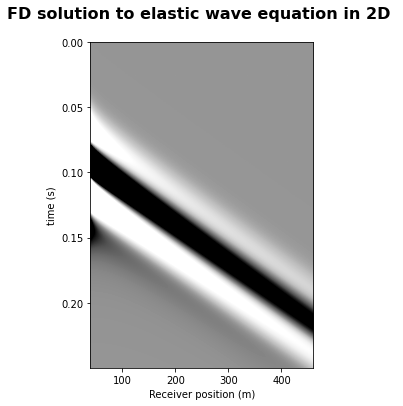

In [13]:
clip = 0.1
extent = [min(seis.rec_pos_all[0]), max(seis.rec_pos_all[0]), (datafd.shape[0]-1)*dt, 0]
vmax = np.max(datafd) * clip
vmin = -vmax
fig, ax = plt.subplots(1, 1, figsize=[4, 6])
ax.imshow(datafd, aspect='auto', vmax=vmax, vmin=vmin, extent = extent,
                interpolation='bilinear', cmap=plt.get_cmap('Greys'))
ax.set_title("FD solution to elastic wave equation in 2D \n", fontsize=16, fontweight='bold')
ax.set_xlabel("Receiver position (m)")
ax.set_ylabel("time (s)")
plt.show()

## Learn more

Now that we have a general idea of how SeisCL works, let's explore each of the features in more detail so that we can perform more robust simulations. It is advisable to perform these in the order below.

 
 - 1.1  [First Step]()


 - [1.2 Model Building](Model_Building.ipynb)


 - [1.3 Sources & Receivers](Sources&Receivers.ipynb)


 - [1.4 Boundary Conditions](BoundaryLayers.ipynb)
 
 
 - [Free surface](FreeSurface.ipynb)
 
 
 - [Elastic & Viscoelastic modeling](Elastic&Viscoelastic-Modeling.ipynb)
 
 
 - [Analytical comparison](Analytical.ipynb)
 
 
 - [Dictionnary of constants](Dictionnary.ipynb)